In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [2]:
url="./Loan_Defaulter.csv"

In [3]:
data = pd.read_csv(url, skiprows=[0])

In [4]:
data.shape

(30203, 25)

<h1>Задаем категориальные признаки</h1>

In [5]:
data['EDUCATION'] = data['EDUCATION'].astype('category')
data['SEX'] = data['SEX'].astype('category')
data['default payment next month'] = data['default payment next month'].astype('category')

<h1>Подготавливаем данные</h1>

In [6]:
dropRows = data[
    ((data['SEX'] == 'X2') | (data['SEX'] == 'SEX') | (data['default payment next month'] == 'Y') | (data['default payment next month'] == 'default payment next month'))
].index
filteredData = data.drop(dropRows)

In [7]:
filteredData['default payment next month'] = pd.factorize(filteredData['default payment next month'])[0]
educationalDummies = pd.get_dummies(filteredData['EDUCATION'])
sexStatusDummies =  pd.get_dummies(filteredData['SEX'])

In [8]:
filteredData = pd.concat((filteredData, educationalDummies), axis=1)
filteredData = pd.concat((filteredData, sexStatusDummies), axis=1)
filteredData = filteredData.drop(['EDUCATION'], axis=1)
filteredData = filteredData.drop(['SEX'], axis=1)

In [9]:
for i in filteredData.columns:
    if filteredData[i].dtype == 'object':
        filteredData[i] = filteredData[i].astype('int64')

In [10]:
filteredData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30201 entries, 0 to 30202
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30201 non-null  int64
 1   LIMIT_BAL                   30201 non-null  int64
 2   MARRIAGE                    30201 non-null  int64
 3   AGE                         30201 non-null  int64
 4   PAY_0                       30201 non-null  int64
 5   PAY_2                       30201 non-null  int64
 6   PAY_3                       30201 non-null  int64
 7   PAY_4                       30201 non-null  int64
 8   PAY_5                       30201 non-null  int64
 9   PAY_6                       30201 non-null  int64
 10  BILL_AMT1                   30201 non-null  int64
 11  BILL_AMT2                   30201 non-null  int64
 12  BILL_AMT3                   30201 non-null  int64
 13  BILL_AMT4                   30201 non-null  int64
 14  BILL_A

<h1>Нормализация признаков</h1>

In [11]:
standartData = (filteredData - filteredData.mean(axis = 0))/filteredData.std(axis = 0)

In [12]:
standartData.dropna()      

,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT6,default payment next month,X3,graduate school,high school,other,university,X2,female,male


In [13]:
standartData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30201 entries, 0 to 30202
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30201 non-null  float64
 1   LIMIT_BAL                   30201 non-null  float64
 2   MARRIAGE                    30201 non-null  float64
 3   AGE                         30201 non-null  float64
 4   PAY_0                       30201 non-null  float64
 5   PAY_2                       30201 non-null  float64
 6   PAY_3                       30201 non-null  float64
 7   PAY_4                       30201 non-null  float64
 8   PAY_5                       30201 non-null  float64
 9   PAY_6                       30201 non-null  float64
 10  BILL_AMT1                   30201 non-null  float64
 11  BILL_AMT2                   30201 non-null  float64
 12  BILL_AMT3                   30201 non-null  float64
 13  BILL_AMT4                   302

<h1>Разбиение на выборки</h1>

In [14]:
x = standartData.drop(['default payment next month','X3','X2'], axis = 1)
y = filteredData['default payment next month']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state = 42)

n_train, _ = x_train.shape 
n_test,  _ = x_test.shape 

print('Train: ',n_train)
print('Test: ', n_test)

Train:  19630
Test:  10571


<h1>Обучение</h1> 

In [16]:
model = MLPClassifier(hidden_layer_sizes = (1,),solver = 'lbfgs', activation = 'logistic')
model.fit(x_train,y_train)

y_train_result = model.predict(x_train)
y_test_result = model.predict(x_test)

<h2>1 слой</h2>

In [17]:
print("Ошибка на обучающем датасете: ", np.mean(y_train != y_train_result))
print("Ошибка на тестовом датасете: ", np.mean(y_test  != y_test_result))

Ошибка на обучающем датасете:  0.1795211411105451
Ошибка на тестовом датасете:  0.1833317566928389


<h2>2 слоя</h2>

In [18]:
model = MLPClassifier(hidden_layer_sizes = (2,),solver = 'lbfgs', activation = 'logistic')
model.fit(x_train,y_train)

y_train_result = model.predict(x_train)
y_test_result = model.predict(x_test)

print("Ошибка на обучающем датасете: ", np.mean(y_train != y_train_result))
print("Ошибка на тестовом датасете: ", np.mean(y_test  != y_test_result))

Ошибка на обучающем датасете:  0.17890983188996434
Ошибка на тестовом датасете:  0.18389934727083532


<h2> Так как ошибки при 2 слоях меньше продолжим работать с 2 слоями</h2>

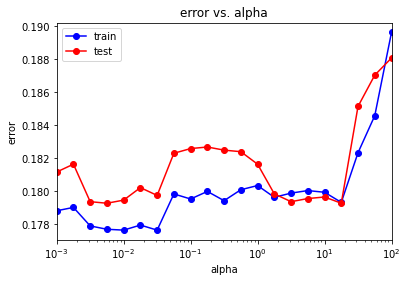

In [19]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []

for alpha in alpha_arr:
    model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (2,), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)
    model.fit(x_train, y_train)

    y_train_result = model.predict(x_train)
    y_test_result = model.predict(x_test)
    
    train_err.append(np.mean(y_train != y_train_result))
    test_err.append(np.mean(y_test != y_test_result))

plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

<h1>Находим оптимальные параметры:</h1>

<h2>Alpha </h2>

In [20]:
min_test_err = np.min(test_err)
alpha_opt = alpha_arr[test_err == min_test_err]
alpha_opt = alpha_opt[0]
print("alpha_opt = ", alpha_opt)

alpha_opt =  0.005623413251903491


In [21]:
model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (2,),solver = 'lbfgs', activation = 'logistic')
model.fit(x_train,y_train)

y_train_result = model.predict(x_train)
y_test_result = model.predict(x_test)

print("Ошибка на обучающем датасете: ", np.mean(y_train != y_train_result))
print("Ошибка на тестовом датасете: ", np.mean(y_test  != y_test_result))

Ошибка на обучающем датасете:  0.18074375955170657
Ошибка на тестовом датасете:  0.18314255983350677


<h2>Количество нейронов</h2>

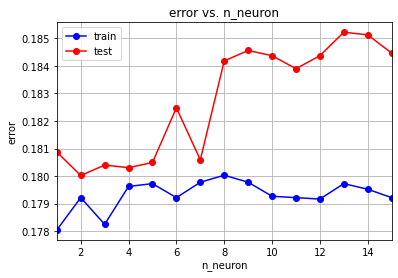

In [22]:
max_neuron = 15
n_neuron = np.arange(1, max_neuron + 1, 1)
test_err = []
train_err = []

for i in n_neuron:
    model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (2, i), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)
    model.fit(x_train, y_train)

    y_train_result = model.predict(x_train)
    y_test_result = model.predict(x_test)
    
    train_err.append(np.mean(y_train != y_train_result))
    test_err.append(np.mean(y_test != y_test_result))

plt.plot(n_neuron, train_err, 'b-o', label = 'train')
plt.plot(n_neuron, test_err, 'r-o', label = 'test')
plt.xlim([np.min(n_neuron), np.max(n_neuron)])
plt.grid(True)
plt.title('error vs. n_neuron')
plt.xlabel('n_neuron')
plt.ylabel('error')
plt.legend()
plt.show()

In [23]:
min_test_err = np.min(test_err)
n_neuron_opt = n_neuron[test_err == min_test_err]
n_neuron_opt = n_neuron_opt[0]
print("n_neuron_opt = ", n_neuron_opt)

n_neuron_opt =  2


In [24]:
model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (2, n_neuron_opt),
                          solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)

model.fit(x_train, y_train)

y_train_result = model.predict(x_train)
y_test_result = model.predict(x_test)
print("Ошибка на обучающем датасете: ", np.mean(y_train != y_train_result))
print("Ошибка на тестовом датасете: ", np.mean(y_test != y_test_result))

Ошибка на обучающем датасете:  0.1792154865002547
Ошибка на тестовом датасете:  0.18002081165452655


<h2>Количество слоев</h2>

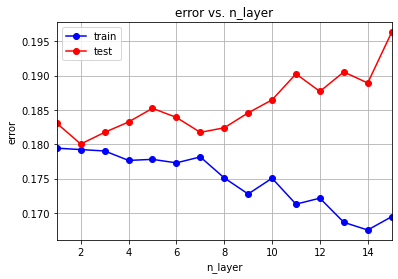

In [25]:
max_layer = 15
n_layer = np.arange(1, max_layer + 1, 1)
test_err = []
train_err = []

for i in n_layer:
    model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (i, n_neuron_opt), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=2000, random_state = 42)
    model.fit(x_train, y_train)

    y_train_result = model.predict(x_train)
    y_test_result = model.predict(x_test)
    
    train_err.append(np.mean(y_train != y_train_result))
    test_err.append(np.mean(y_test != y_test_result))

plt.plot(n_layer, train_err, 'b-o', label = 'train')
plt.plot(n_layer, test_err, 'r-o', label = 'test')
plt.xlim([np.min(n_layer), np.max(n_layer)])
plt.grid(True)
plt.title('error vs. n_layer')
plt.xlabel('n_layer')
plt.ylabel('error')
plt.legend()
plt.show()

In [26]:
min_test_err = np.min(test_err)
n_layer_opt = n_neuron[test_err == min_test_err]
n_layer_opt = n_layer_opt[0]
print("n_layer_opt = ", n_layer_opt)

n_layer_opt =  2


<h2>Оптимальные параметры</h2>

In [29]:
model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (n_layer_opt, n_neuron_opt),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
model.fit(x_train, y_train)

y_train_result = model.predict(x_train)
y_test_result = model.predict(x_test)
print('Оптимальное alpha',alpha_opt)
print('Оптимальное количество нейронов', n_neuron_opt)
print('Оптимальное количество слоев', n_layer_opt)
print("Ошибка на обучающем датасете: ", np.mean(y_train != y_train_result))
print("Ошибка на тестовом датасете: ", np.mean(y_test != y_test_result))

Оптимальное alpha 0.005623413251903491
Оптимальное количество нейронов 2
Оптимальное количество слоев 2
Ошибка на обучающем датасете:  0.1792154865002547
Ошибка на тестовом датасете:  0.18002081165452655
